# Problem Set 2
# Reconstruction of acceleration data

**Total points:** 30

**Due:** Friday April 7th, 7pm CEST

**Format:** IPython Notebook or python program

The purpose of this problem set is to use acceleration data to reconstruct motion. 
Such data can be obtained using the sensors in standard (smart) mobile phones.

The data you should use is

    data/autofahrt.txt
    
The data were obtained in a car, with the mobile phone in a fixed position, facing forward. The car started from zero velocity, accelerated towards a roundabout, circled around it once and returned along the street it came.
Note this data set has been recorded at relatively low time resolution. 
[You may assume for simplicity that the mobile coordinate system is at any time aligned with the forward direction.]

Please take care to produce readable code that uses functions and numpy arrays as appropriate.

## Part 1 - Integration the forward acceleration

(12 points)

**Start by reading in the acceleration data shown above, and plot it with Matplotlib**.

Then, calculate and plot the projected forward distance traversed by the mobile phone as a function of time.

273
The total distance traveled
2788.96347064


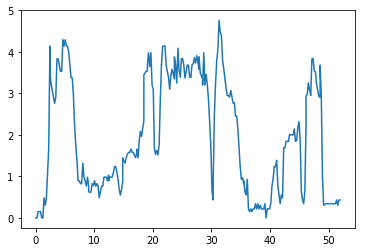

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f = open('/home/bhavya/Documents/AA/PythonProgramming/Day_2/data/autofahrt.txt','r') 
time = []
a_x = []
a_y = []
for line in f:
    columns = line.split(' ')
    if len(columns) >= 2:
        time.append(columns[0])
        a_x.append(columns[1])
        a_y.append(columns[2])
        

time.remove('Time')
time.remove('s')
#print time
a_x.remove('Gx')
a_x.remove('m/s^2')
#print a_x
a_y.remove('Gy')
a_y.remove('m/s^2')
#print a_y
print len(a_x)
#Here upper code is to read a data file
#here  we find an accelaration in 2D. for 3D we can define accelaration for 3d and plot with time.
a = []
for i in range(len(a_x)):
    #print i
    fl_ax = float(a_x[i])
    fl_ay = float(a_y[i])
    #print np.square(fl_ax)
    #print np.square(fl_ay)
    a.append(np.sqrt(np.square(fl_ax)+ np.square(fl_ay)))
    
#print a  
time_f = []
for i in range(len(time)):
    time_f.append(float(time[i]))

plt.plot(time_f, a)


#accelatation is the second derivative, with respect to time, of accelartion. 
#Here i would explain the total projected  forward distance as the equal to the total forwrd distance in every timestep
#which can be calculated by the accelaration in everytime step.

dist_t = [0.0]
vel = [0.0]
for i in range(len(time)-1):
    t1 = float(time[i])
    t2 = float(time[i+1])
    delta_t = t2-t1
    vel.append(vel[i]+a[i]*delta_t)
    dist_t.append(vel[i]*delta_t + a[i]*(0.5)*(delta_t**2))#distance travel in every time step
    #print i
    #print dist_t[i]
    
    
#print dist_t

#Total distance traveled.

total_dist = 0

for i in range(len(dist_t)):
    total_dist += dist_t[i]
    
print ('The total distance traveled') 
print total_dist
    


## Part 2 - Coordinate Systems

(8 points)

Work out the acceleration vector in the laboratory system.



273


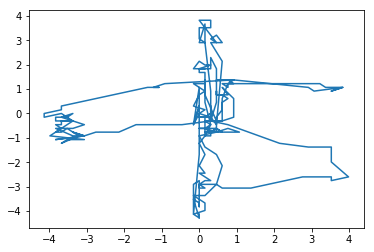

In [10]:
#Here accoding my understanding i have to plot data with a_x and a_y in the lebororatory system.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f = open('/home/bhavya/Documents/AA/PythonProgramming/Day_2/data/autofahrt.txt','r') 
time = []
a_x = []
a_y = []
for line in f:
    columns = line.split(' ')
    if len(columns) >= 2:
        time.append(columns[0])
        a_x.append(columns[1])
        a_y.append(columns[2])
        

time.remove('Time')
time.remove('s')
#print time
a_x.remove('Gx')
a_x.remove('m/s^2')
#print a_x
a_y.remove('Gy')
a_y.remove('m/s^2')
#print a_y
print len(a_x)

ax=[0.0]
for i in range(len(a_x)):
    ax.append(float(a_x[i]))
ay=[0.0]    
for i in range(len(a_y)):
    ay.append(float(a_y[i]))

#print ax, ay
plt.plot(ax,ay)

## Part 3 - Visualizing the track

(10 points)

Integrate the acceleration in the laboratory system and plot the track. Does your result correspond to the above description?

Discuss the (possible) limitations of your code and the impact of sparse time sampling.

273
the total distance traveled.
910.811277675


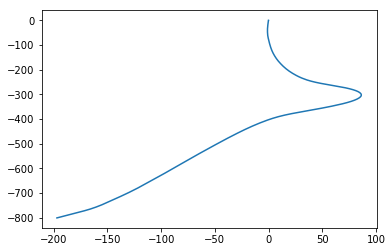

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f = open('/home/bhavya/Documents/AA/PythonProgramming/Day_2/data/autofahrt.txt','r') 
time = []
a_x = []
a_y = []
for line in f:
    columns = line.split(' ')
    if len(columns) >= 2:
        time.append(columns[0])
        a_x.append(columns[1])
        a_y.append(columns[2])
       # print time
        

time.remove('Time')
time.remove('s')
#print time
a_x.remove('Gx')
a_x.remove('m/s^2')
#print a_x
a_y.remove('Gy')
a_y.remove('m/s^2')
#print a_y
print len(time)

ax=[0.0]
for i in range(len(a_x)):
    ax.append(float(a_x[i]))
ay=[0.0]    
for i in range(len(a_y)):
    ay.append(float(a_y[i]))
    
#print ax
#print ay


x = [0.0]
vx= [0.0]
for i in range(len(time)-1):
    t1 = float(time[i])
    t2 = float(time[i+1])
    delta_t = t2-t1
    vx.append(vx[i]+ax[i]*delta_t)
    #print i
    #print delta_t
    #print a[i]
    x.append(vx[i]*delta_t + ax[i]*(0.5)*np.square(delta_t))#distance travel in every time step
    #print i
    #print x[i]
    
y = [0.0]
vy= [0.0]
for i in range(len(time)-1):
    t1 = float(time[i])
    t2 = float(time[i+1])
    delta_t = t2-t1
    vy.append(vy[i]+ay[i]*delta_t)
    
    #print delta_t
    #print a[i]
    y.append(vy[i]*delta_t + ay[i]*(0.5)*np.square(delta_t))#distance travel in every time step
    #print i
    #print dist_t[i]
    
xdistance =[0.0]
for i in range(len(x)):
    xdistance.append(xdistance[i]+x[i])
                     
ydistance = [0.0]
for i in range(len(y)):
    ydistance.append(ydistance[i]+y[i])
    
plt.plot(xdistance, ydistance)

s = [0.0]
for i in range(len(x)):
    s.append(np.sqrt(np.square(x[i])+np.square(y[i])))
    #print i
    #print s[i]

distance = 0
for i in range(len(s)):
    distance+=s[i]
    
print 'the total distance traveled.'    
print distance
    

    
#print len(x)

#s = []    
#for i in range(len(x)):
#    s.append(np.sqrt(np.square(x[i]) + np.square(y[i])))

In [ ]:
#Here you can see the total distance traveled is very different from the problem one, and also the total the trace of 
#the car is not the circular as mentioned in the discription above.
